In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("DA Assignment - Sheet1.csv")

In [3]:
df.head()

,Id,Requester id,Group,Status,Priority,Via,Created at,Updated at,Assigned at,Initially assigned at,...,Reopens,Replies,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours,Manual Tagging of Categories [list]
0,297732,10300555531549,Support,Solved,Low,Mail,08-04-2023 20:52,14-06-2023 16:30,09-04-2023 10:28,09-04-2023 10:28,...,11,11,173.0,12975.0,6488.0,96218.0,47978.0,17853.0,8516.0,Is my treatment covered (IMTC)
1,311457,10420228868125,Reimbursement Claims,Closed,Low,Mail,24-04-2023 19:32,15-06-2023 16:37,25-04-2023 10:18,25-04-2023 10:18,...,10,10,1527.0,2984.0,1527.0,45893.0,22853.0,30113.0,15139.0,-
2,329907,10991633548957,Support,Solved,Low,Mail,16-05-2023 17:43,30-05-2023 14:56,16-05-2023 18:18,16-05-2023 18:18,...,10,11,61.0,1563.0,843.0,19993.0,9913.0,7115.0,3335.0,Claims
3,301553,10376247288477,Support,Solved,Low,Mail,13-04-2023 11:03,15-06-2023 20:55,13-04-2023 13:04,13-04-2023 13:04,...,9,9,381.0,2888.0,1448.0,91313.0,45953.0,18221.0,9401.0,Claims
4,310966,7302858920989,Support,Closed,Low,Mail,24-04-2023 13:21,08-06-2023 18:37,27-04-2023 14:48,24-04-2023 13:48,...,9,9,37.0,37.0,37.0,36304.0,17739.0,7427.0,4008.0,Claims


In [4]:
df["Via"].value_counts()

Mail                      13081
Internal Communication     2028
OutBound                   1051
Closed Ticket               316
Name: Via, dtype: int64

In [5]:

### created a new dataframe where issues were contacted through mails
new_df= df[df["Via"] == "Mail"]

In [6]:
new_df.shape

(13081, 23)

In [7]:
### transformed columns into datetime 

new_df["Solved at"] = pd.to_datetime(new_df["Solved at"], dayfirst=True)
new_df["Initially assigned at"] = pd.to_datetime(new_df["Initially assigned at"],dayfirst=True)
new_df["Assigned at"] = pd.to_datetime(new_df["Assigned at"],dayfirst=True)


C:\Users\psure\AppData\Local\Temp\ipykernel_17376\219468538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Solved at"] = pd.to_datetime(new_df["Solved at"], dayfirst=True)
C:\Users\psure\AppData\Local\Temp\ipykernel_17376\219468538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Initially assigned at"] = pd.to_datetime(new_df["Initially assigned at"],dayfirst=True)
C:\Users\psure\AppData\Local\Temp\ipykernel_17376\219468538.py:5: SettingWithCopyWarning: 
A value is trying to be set 

In [8]:
new_df[new_df["Assigned at"] != new_df["Initially assigned at"]].shape

(1041, 23)

In [9]:

### calculated the difference between Intially assigned date and solved date
new_df["diff"] = new_df['Solved at'] - new_df['Initially assigned at']

C:\Users\psure\AppData\Local\Temp\ipykernel_17376\1129799577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["diff"] = new_df['Solved at'] - new_df['Initially assigned at']


In [10]:
 ### calculated the difference between Intially assigned date and solved date in hours 
data1 = new_df[["diff"]]
 
 df1 = pd.DataFrame(data1)

 df1['timedelta'] = pd.to_timedelta(df1['diff'])
 df1['hours'] = df1['timedelta'].dt.total_seconds() / 3600

 print(df1)

                  diff        timedelta        hours
0     66 days 06:02:00 66 days 06:02:00  1590.033333
1     31 days 06:08:00 31 days 06:08:00   750.133333
2     13 days 20:38:00 13 days 20:38:00   332.633333
3     63 days 07:51:00 63 days 07:51:00  1519.850000
4     25 days 04:37:00 25 days 04:37:00   604.616667
...                ...              ...          ...
16471  0 days 00:36:00  0 days 00:36:00     0.600000
16472  4 days 00:16:00  4 days 00:16:00    96.266667
16473              NaT              NaT          NaN
16474  8 days 06:34:00  8 days 06:34:00   198.566667
16475  0 days 04:31:00  0 days 04:31:00     4.516667

[13081 rows x 3 columns]


In [11]:
new_df["hours_group_hold_the_issue"] = df1["hours"]

C:\Users\psure\AppData\Local\Temp\ipykernel_17376\732173857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["hours_group_hold_the_issue"] = df1["hours"]


In [12]:
new_df.sample(2)

,Id,Requester id,Group,Status,Priority,Via,Created at,Updated at,Assigned at,Initially assigned at,...,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours,Manual Tagging of Categories [list],diff,hours_group_hold_the_issue
14209,335374,11115821251869,Support,Closed,Low,Mail,23-05-2023 09:12,13-06-2023 18:37,2023-05-23 10:40:00,2023-05-23 10:40:00,...,232.0,1944.0,1224.0,1944.0,1224.0,1944.0,1224.0,-,1 days 06:57:00,30.95
2294,334761,11100725512605,Reimbursement Claims,Solved,Low,Mail,22-05-2023 15:54,09-06-2023 11:32,2023-05-22 17:38:00,2023-05-22 17:38:00,...,373.0,9822.0,4782.0,25658.0,12698.0,20168.0,9976.0,-,17 days 17:54:00,425.90


In [13]:
new_df.columns

Index(['Id', 'Requester id', 'Group', 'Status', 'Priority', 'Via',
       'Created at', 'Updated at', 'Assigned at', 'Initially assigned at',
       'Solved at', 'Resolution time', 'Satisfaction Score', 'Reopens',
       'Replies', 'First reply time in minutes within business hours',
       'First resolution time in minutes',
       'First resolution time in minutes within business hours',
       'Full resolution time in minutes',
       'Full resolution time in minutes within business hours',
       'Requester wait time in minutes',
       'Requester wait time in minutes within business hours',
       'Manual Tagging of Categories [list]', 'diff',
       'hours_group_hold_the_issue'],
      dtype='object')

In [14]:
new_df[new_df["Full resolution time in minutes"] < new_df["Full resolution time in minutes within business hours"]].shape

(0, 25)

In [15]:
new_df[new_df["Full resolution time in minutes"] < new_df["Full resolution time in minutes within business hours"]].shape

(0, 25)

In [16]:
new_df[new_df["Requester wait time in minutes"] < new_df["Requester wait time in minutes within business hours"]].shape

(0, 25)

In [17]:
new_df.columns

Index(['Id', 'Requester id', 'Group', 'Status', 'Priority', 'Via',
       'Created at', 'Updated at', 'Assigned at', 'Initially assigned at',
       'Solved at', 'Resolution time', 'Satisfaction Score', 'Reopens',
       'Replies', 'First reply time in minutes within business hours',
       'First resolution time in minutes',
       'First resolution time in minutes within business hours',
       'Full resolution time in minutes',
       'Full resolution time in minutes within business hours',
       'Requester wait time in minutes',
       'Requester wait time in minutes within business hours',
       'Manual Tagging of Categories [list]', 'diff',
       'hours_group_hold_the_issue'],
      dtype='object')

In [18]:
pd.set_option('display.max_columns', None)
new_df.sample()

,Id,Requester id,Group,Status,Priority,Via,Created at,Updated at,Assigned at,Initially assigned at,Solved at,Resolution time,Satisfaction Score,Reopens,Replies,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours,Manual Tagging of Categories [list],diff,hours_group_hold_the_issue
13042,330331,9923266719773,Endorsements,Closed,Low,Mail,17-05-2023 07:02,08-06-2023 16:35,2023-05-19 15:32:00,2023-05-19 15:32:00,2023-05-19 15:32:00,57.0,NaN,0,1,1833.0,3390.0,1833.0,3390.0,1833.0,3390.0,1833.0,-,0 days,0.0


In [19]:
### dropped the column after doing transformations

new_df.drop(["Id","Requester id", "Created at","Updated at","Assigned at"], axis=1, inplace = True )
new_df.drop(["First reply time in minutes within business hours"], axis=1, inplace = True )
new_df.drop(["First resolution time in minutes"], axis=1, inplace = True )
new_df.drop(["Full resolution time in minutes"], axis=1, inplace = True )
new_df.drop(["Requester wait time in minutes", "Reopens"], axis=1, inplace = True )


C:\Users\psure\AppData\Local\Temp\ipykernel_17376\3152608108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(["Id","Requester id", "Created at","Updated at","Assigned at"], axis=1, inplace = True )
C:\Users\psure\AppData\Local\Temp\ipykernel_17376\3152608108.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(["First reply time in minutes within business hours"], axis=1, inplace = True )
C:\Users\psure\AppData\Local\Temp\ipykernel_17376\3152608108.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

In [20]:
new_df.isnull().sum()

Group                                                        0
Status                                                       0
Priority                                                     0
Via                                                          0
Initially assigned at                                      126
Solved at                                                 1823
Resolution time                                           1823
Satisfaction Score                                        9845
Replies                                                      0
First resolution time in minutes within business hours    1469
Full resolution time in minutes within business hours     1823
Requester wait time in minutes within business hours       124
Manual Tagging of Categories [list]                          0
diff                                                      1823
hours_group_hold_the_issue                                1823
dtype: int64

In [21]:
### removed rows having nan values

new_df.dropna(subset = "Full resolution time in minutes within business hours", inplace=True, axis= 0)

C:\Users\psure\AppData\Local\Temp\ipykernel_17376\446981451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(subset = "Full resolution time in minutes within business hours", inplace=True, axis= 0)


In [22]:
new_df.isnull().sum()

Group                                                        0
Status                                                       0
Priority                                                     0
Via                                                          0
Initially assigned at                                        0
Solved at                                                    0
Resolution time                                              0
Satisfaction Score                                        8022
Replies                                                      0
First resolution time in minutes within business hours       0
Full resolution time in minutes within business hours        0
Requester wait time in minutes within business hours         0
Manual Tagging of Categories [list]                          0
diff                                                         0
hours_group_hold_the_issue                                   0
dtype: int64

In [23]:
### A larger portion (8022 rows) of the Satisfaction Score were having null values, so, I filled it with zero 

new_df['Satisfaction Score'] = new_df['Satisfaction Score'].fillna(0)


C:\Users\psure\AppData\Local\Temp\ipykernel_17376\1587147339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Satisfaction Score'] = new_df['Satisfaction Score'].fillna(0)


In [24]:
new_df['Satisfaction Score'].value_counts()

0          8022
Offered    2500
5           364
4           288
3            59
1            13
2            12
Name: Satisfaction Score, dtype: int64

In [25]:
### converting minute columns into hours for analysis


new_df["First_resolution_in_business_hours"] = (new_df["First resolution time in minutes within business hours"]/60).astype(int)

new_df["Full_resolution_in_business_hours"] = (new_df["Full resolution time in minutes within business hours"]/60).astype(int)

new_df["Requester_wait_time_in_business_hours"] = (new_df["Requester wait time in minutes within business hours"]/60).astype(int)

new_df["hours_group_hold_the_issue"] = new_df["hours_group_hold_the_issue"].astype(int)

### Renaming "Manual Tagging of Categories [list]" as  "type_of_ticket" for better understanding 

new_df.rename(columns={"Manual Tagging of Categories [list]": "type_of_ticket"}, inplace = True)

C:\Users\psure\AppData\Local\Temp\ipykernel_17376\640911176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["First_resolution_in_business_hours"] = (new_df["First resolution time in minutes within business hours"]/60).astype(int)
C:\Users\psure\AppData\Local\Temp\ipykernel_17376\640911176.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Full_resolution_in_business_hours"] = (new_df["Full resolution time in minutes within business hours"]/60).astype(int)
C:\Users\psure\AppData\Local\Tem

In [26]:
new_df.drop(["First resolution time in minutes within business hours"], axis=1, inplace = True )
new_df.drop(["Full resolution time in minutes within business hours"], axis=1, inplace = True )
new_df.drop(["Requester wait time in minutes within business hours", "diff"], axis=1, inplace = True )

C:\Users\psure\AppData\Local\Temp\ipykernel_17376\3783136717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(["First resolution time in minutes within business hours"], axis=1, inplace = True )
C:\Users\psure\AppData\Local\Temp\ipykernel_17376\3783136717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(["Full resolution time in minutes within business hours"], axis=1, inplace = True )
C:\Users\psure\AppData\Local\Temp\ipykernel_17376\3783136717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

In [27]:
new_df.columns

Index(['Group', 'Status', 'Priority', 'Via', 'Initially assigned at',
       'Solved at', 'Resolution time', 'Satisfaction Score', 'Replies',
       'type_of_ticket', 'hours_group_hold_the_issue',
       'First_resolution_in_business_hours',
       'Full_resolution_in_business_hours',
       'Requester_wait_time_in_business_hours'],
      dtype='object')

In [28]:
new_df.head()

,Group,Status,Priority,Via,Initially assigned at,Solved at,Resolution time,Satisfaction Score,Replies,type_of_ticket,hours_group_hold_the_issue,First_resolution_in_business_hours,Full_resolution_in_business_hours,Requester_wait_time_in_business_hours
0,Support,Solved,Low,Mail,2023-04-09 10:28:00,2023-06-14 16:30:00,1604.0,Offered,11,Is my treatment covered (IMTC),1590,108,799,141
1,Reimbursement Claims,Closed,Low,Mail,2023-04-25 10:18:00,2023-05-26 16:26:00,765.0,0,10,-,750,25,380,252
2,Support,Solved,Low,Mail,2023-05-16 18:18:00,2023-05-30 14:56:00,333.0,4,11,Claims,332,14,165,55
3,Support,Solved,Low,Mail,2023-04-13 13:04:00,2023-06-15 20:55:00,1522.0,Offered,9,Claims,1519,24,765,156
4,Support,Closed,Low,Mail,2023-04-24 13:48:00,2023-05-19 18:25:00,605.0,4,9,Claims,604,0,295,66


In [29]:
### filled nan values present in ticket column by "others" parameter
new_df["type_of_ticket"] = new_df["type_of_ticket"].replace("-", "others")

C:\Users\psure\AppData\Local\Temp\ipykernel_17376\1561845219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["type_of_ticket"] = new_df["type_of_ticket"].replace("-", "others")


Below is the analysis derived from the dataset

a. How are the efficiency numbers looking like? Can you share your views?

<Axes: xlabel='Group', ylabel='count'>

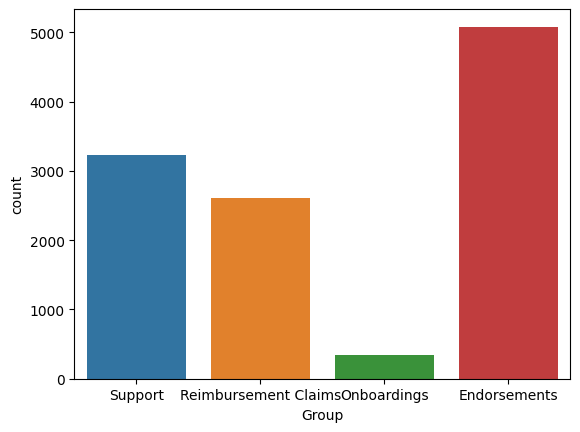

In [30]:

sns.countplot(x = "Group", data = new_df)

### "Endorsements" group solves maximum problems and least is solved by "Onboardings" team

In [31]:
new_df["Group"].value_counts()

Endorsements            5081
Support                 3236
Reimbursement Claims    2603
Onboardings              338
Name: Group, dtype: int64

b. Which groups are quick, slow etc. Create a table + relevant charts.

In [32]:


mean_values = new_df.groupby('Group')['Full_resolution_in_business_hours'].mean().astype(int)

print(mean_values)

###  "Support" group is quick in terms of average time taken to solve a problem is 72 hours  
###  "Onboardings" group  slow in terms of average time taken to solve a problem is 301 hours





Group
Endorsements            132
Onboardings             301
Reimbursement Claims    120
Support                  72
Name: Full_resolution_in_business_hours, dtype: int32


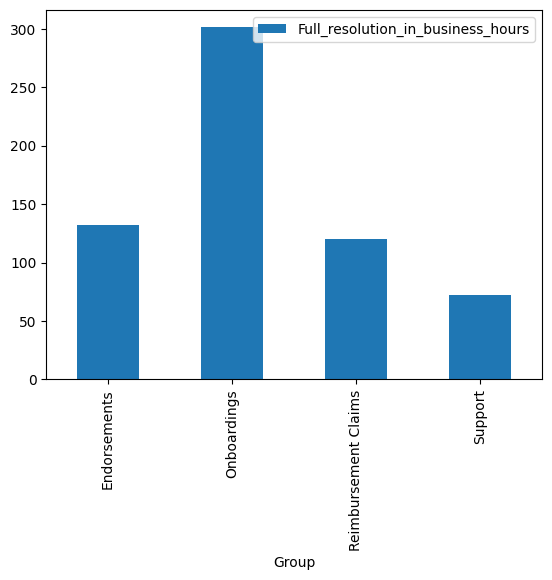

In [33]:
new_df[['Group','Full_resolution_in_business_hours']].groupby('Group').mean().plot.bar()
plt.show()

Axes(0.125,0.11;0.775x0.77)


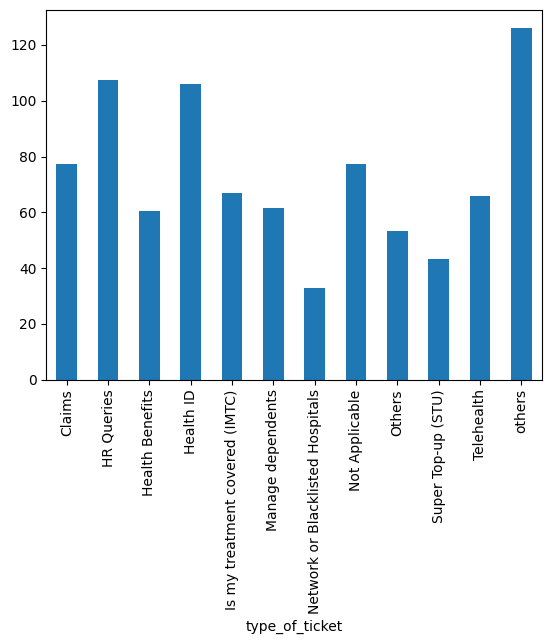

In [34]:


mean_values = new_df.groupby('type_of_ticket')['Full_resolution_in_business_hours'].mean().plot.bar()

print(mean_values)

### "HR Queries", "Health ID", "Claims" these tickets are taking more tyme to resolve a problem

c. What type of tickets are taking the most time to resolve? Create a table + relevant charts.

In [35]:
mean_values = new_df.groupby('type_of_ticket')['Full_resolution_in_business_hours'].mean().astype(int)
print(mean_values)

type_of_ticket
Claims                               77
HR Queries                          107
Health Benefits                      60
Health ID                           105
Is my treatment covered (IMTC)       66
Manage dependents                    61
Network or Blacklisted Hospitals     32
Not Applicable                       77
Others                               53
Super Top-up (STU)                   43
Telehealth                           65
others                              126
Name: Full_resolution_in_business_hours, dtype: int32


d. Create the different type of data types we can infer from this data.

In [36]:


### "Endorsements" group has solved maximum problems
### All the problem solved via mail by these different groups has been categorised at low "priority" level
### "Endorsements" group is doing great job as they are keeping the issue in hold for mimimum amount of time  and solving then as soon as possible
### “Waiting time” for customer is minimum for Network or Blacklisted Hospitals and maximum for Health ID department
### Waiting time” for customer is minimum for support team and maximum for Reimbursement Claims group.



<Axes: xlabel='Group', ylabel='count'>

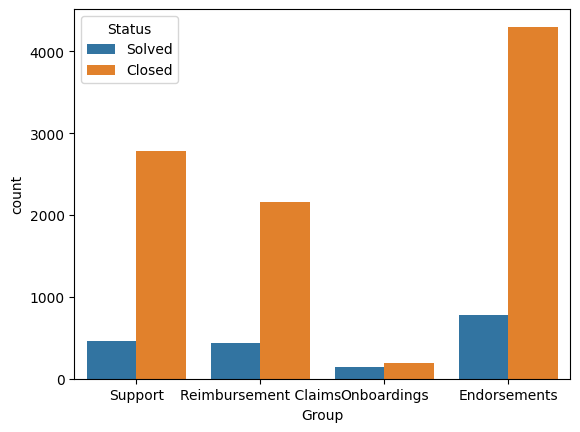

In [37]:
### "Endorsements" group has solved maximum problems
sns.countplot(x = "Group" ,data = new_df, hue ="Status" )

<Axes: xlabel='Group', ylabel='count'>

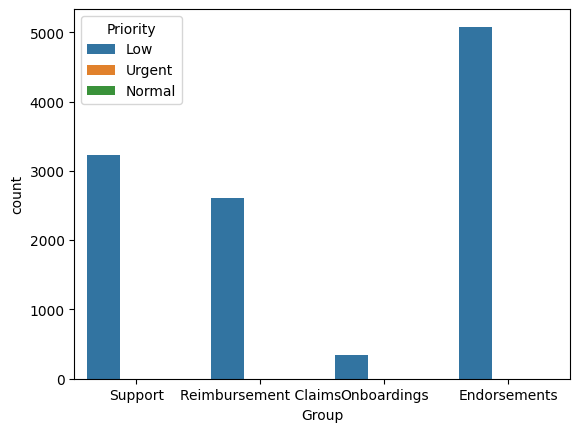

In [38]:

### All the problem solved via mail by these different groups has been categorised at low "priority" level
sns.countplot(x = "Group" ,data = new_df, hue ="Priority" )

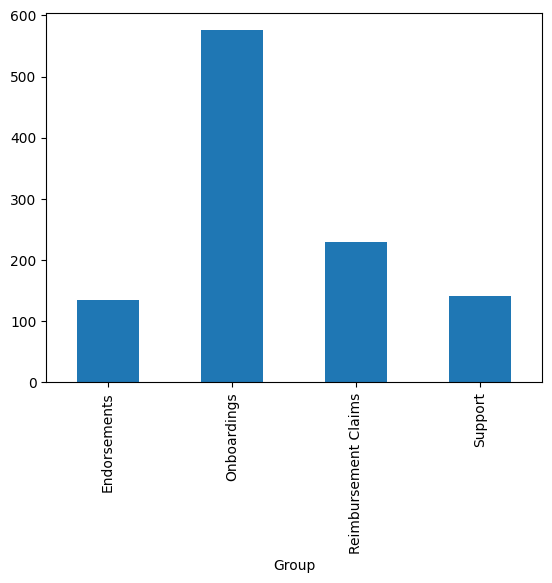

In [39]:
### "Endorsements" group is doing great job as they are keeping the issue in hold for mimimum amount of time  and solving then as soon as possible
mean_values = new_df.groupby('Group')['hours_group_hold_the_issue'].mean().plot.bar()

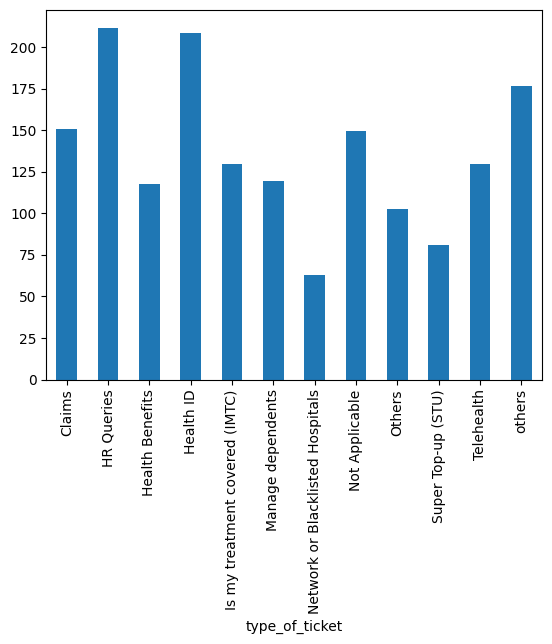

In [40]:
### "HR Queries" group is doing great job as they are keeping the issue in hold for mimimum amount of time  and solving then as soon as possible
mean_values = new_df.groupby('type_of_ticket')['hours_group_hold_the_issue'].mean().plot.bar()

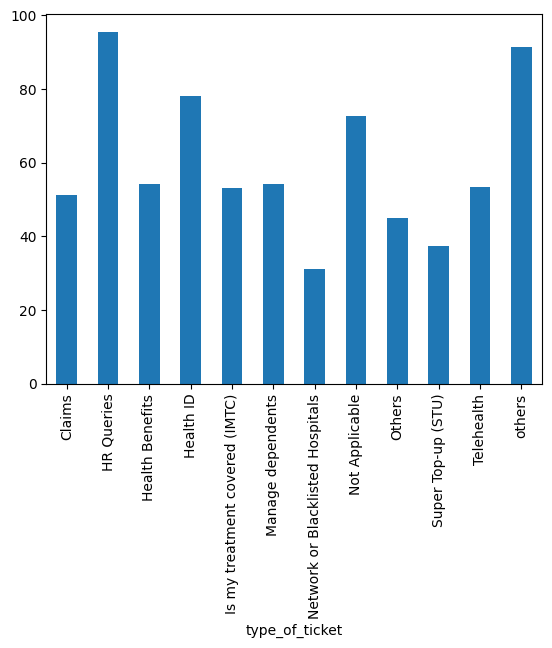

In [41]:
### “Waiting time” for customer is minimum for Network or Blacklisted Hospitals and maximum for Health ID department
mean_values = new_df.groupby('type_of_ticket')['Requester_wait_time_in_business_hours'].mean().plot.bar()

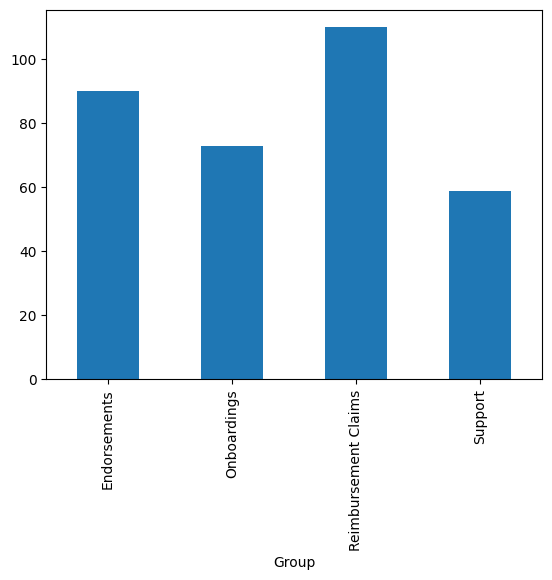

In [42]:
### Waiting time” for customer is minimum for support team and maximum for Reimbursement Claims group.
mean_values = new_df.groupby('Group')['Requester_wait_time_in_business_hours'].mean().astype(int).plot.bar()